In [2]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from src.managers.cross_validation import TimeSeriesCrossValidator
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('processed_fred_data.csv')

2024-09-08 13:41:42,060 - INFO - Created 10 splits using sliding window method


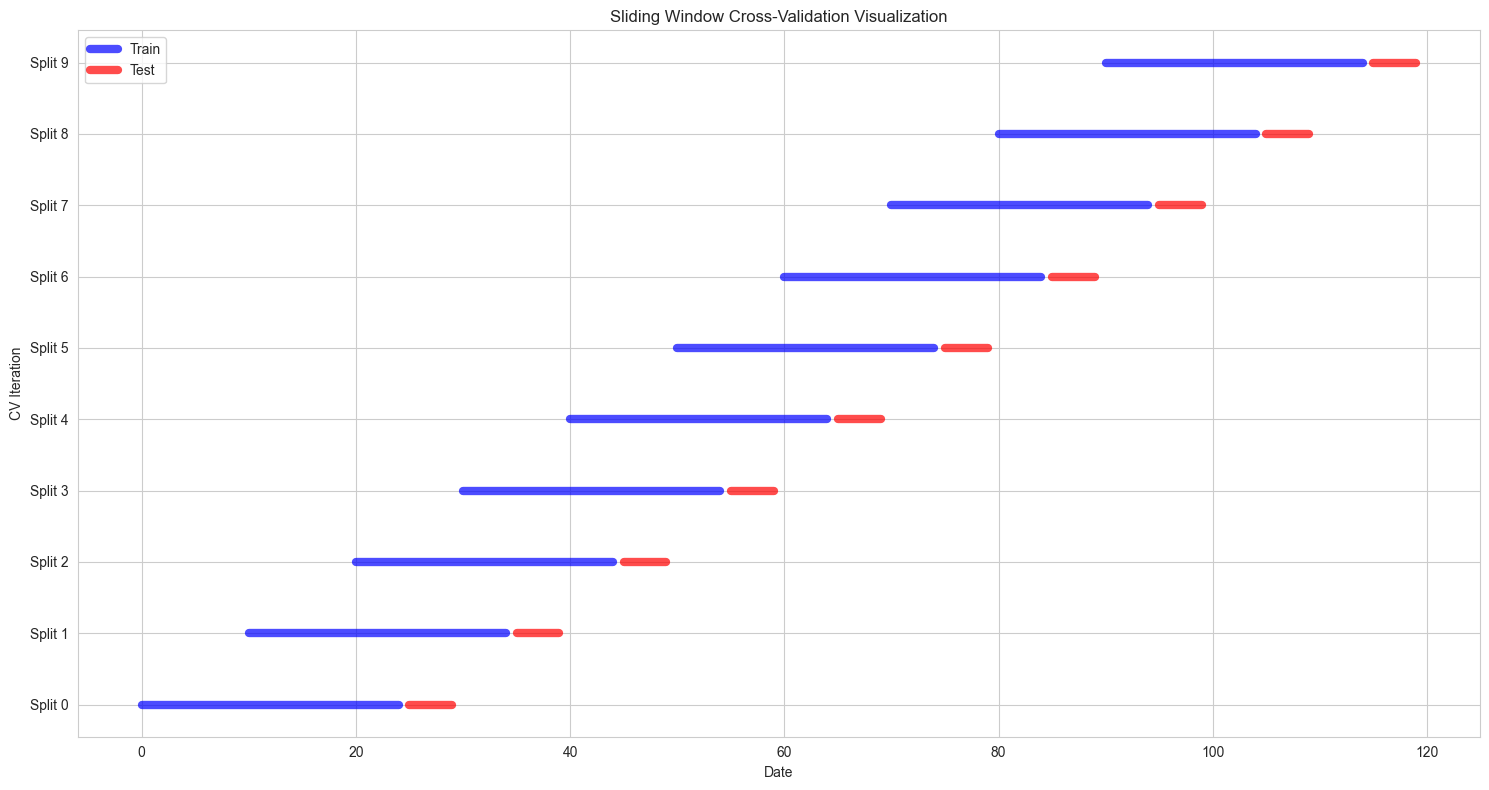

In [3]:
# Assuming 'data' is already loaded and contains the processed FRED data
cv = TimeSeriesCrossValidator(data)

# Parameters from initial_run.py
window_size = 25
step_size = 10
test_size = 5

# Generate sliding window splits
sliding_splits = cv.perform_cross_validation(method='sliding', window_size=window_size, step_size=step_size, test_size=test_size)

# Prepare data for visualization
split_data = []
for i, (train, test) in enumerate(sliding_splits):
    split_data.append({
        'split': i,
        'train_start': train.index.min(),
        'train_end': train.index.max(),
        'test_start': test.index.min(),
        'test_end': test.index.max()
    })

split_df = pd.DataFrame(split_data)

# Create the plot
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

for i, row in split_df.iterrows():
    plt.plot([row['train_start'], row['train_end']], [i, i], color='blue', linewidth=6, alpha=0.7, label='Train' if i == 0 else "")
    plt.plot([row['test_start'], row['test_end']], [i, i], color='red', linewidth=6, alpha=0.7, label='Test' if i == 0 else "")

plt.yticks(range(len(split_df)), [f'Split {i}' for i in range(len(split_df))])
plt.xlabel('Date')
plt.ylabel('CV Iteration')
plt.title('Sliding Window Cross-Validation Visualization')
plt.legend()

plt.tight_layout()
plt.show()


2024-09-08 13:42:09,280 - INFO - Created 11 splits using rolling window method


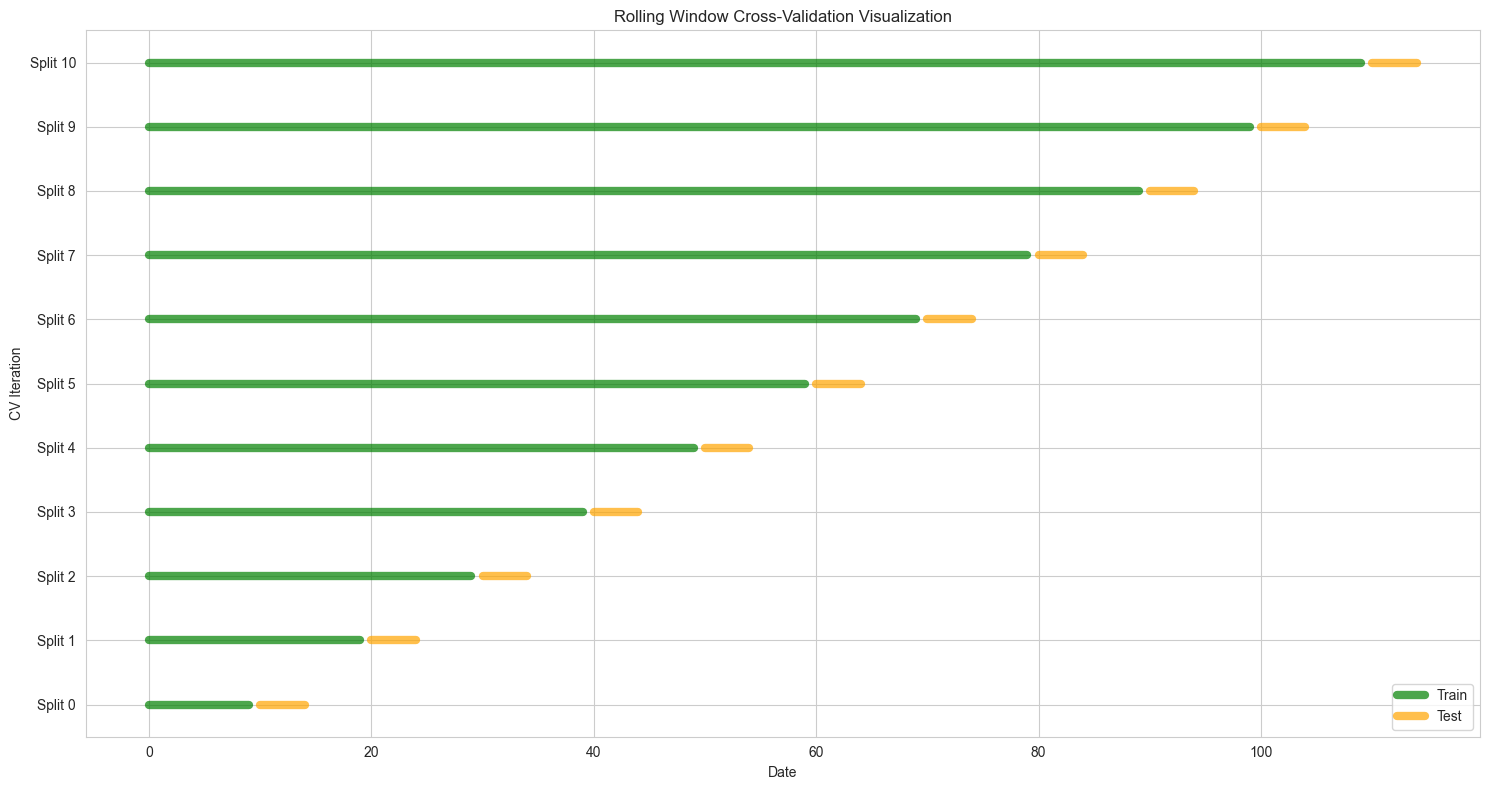

In [4]:
# Parameters for rolling window
initial_train_size = 10
step_size = 10
test_size = 5

# Generate rolling window splits
rolling_splits = cv.perform_cross_validation(method='rolling', initial_train_size=initial_train_size, step_size=step_size, test_size=test_size)

# Prepare data for visualization
rolling_split_data = []
for i, (train, test) in enumerate(rolling_splits):
    rolling_split_data.append({
        'split': i,
        'train_start': train.index.min(),
        'train_end': train.index.max(),
        'test_start': test.index.min(),
        'test_end': test.index.max()
    })

rolling_split_df = pd.DataFrame(rolling_split_data)

# Create the plot for rolling window
plt.figure(figsize=(15, 8))
sns.set_style("whitegrid")

for i, row in rolling_split_df.iterrows():
    plt.plot([row['train_start'], row['train_end']], [i, i], color='green', linewidth=6, alpha=0.7, label='Train' if i == 0 else "")
    plt.plot([row['test_start'], row['test_end']], [i, i], color='orange', linewidth=6, alpha=0.7, label='Test' if i == 0 else "")

plt.yticks(range(len(rolling_split_df)), [f'Split {i}' for i in range(len(rolling_split_df))])
plt.xlabel('Date')
plt.ylabel('CV Iteration')
plt.title('Rolling Window Cross-Validation Visualization')
plt.legend()

plt.tight_layout()
plt.show()


XGB is Extreme Graident Boosting [see paper](https://jerryfriedman.su.domains/ftp/trebst.pdf). 

A tree ensemble is a set of classification and regression trees.

$$
\hat{y}_i = \sum_{k=1}^{K} f_k(x_i), f_k \in \mathcal{F}
$$
where $K$ is the number of trees, $f_k$ is a function in the space of functions, and $\mathcal{F}$ is the set of all possible classification and regression trees.

This leads to the following optimization: 
$$
\text{obj}(\theta) = \sum_{i=1}^{n} l(y_i, \hat{y}_i) + \sum_{k=1}^{K} \Omega(f_k)
$$
where $l$ is the loss function, $\Omega$ is the regularization function, and $\theta$ is the set of all the parameters in the model. 

Random forests also use tree ensembles, the key difference will be how we train the two. 